<a href="https://colab.research.google.com/github/madhura2024/deep_learning/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'cat-and-dog' dataset.
Path to dataset files: /kaggle/input/cat-and-dog
Root contents: ['test_set', 'training_set']
Final training directory: /kaggle/input/cat-and-dog/training_set
Classes: ['training_set']
Found 7205 images belonging to 1 classes.
Found 800 images belonging to 1 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,757,249 (10.52 MB)

 Trainable params: 2,755,201 (10.51 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/2
113/113 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.7362 - loss: 0.5918 - val_accuracy: 1.0000 - val_loss: 0.0303
Epoch 2/2
113/113 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9976 - loss: 0.0676 - val_accuracy: 1.0000 - val_loss: 0.0119


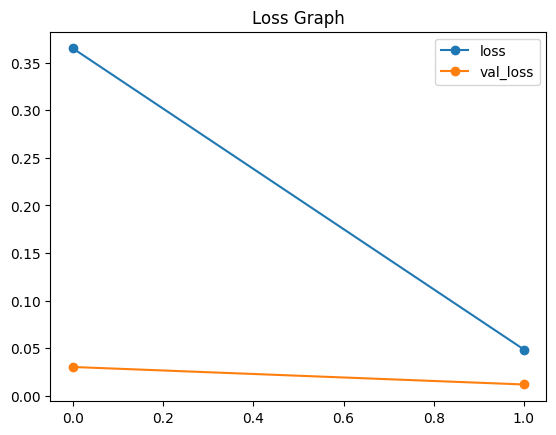

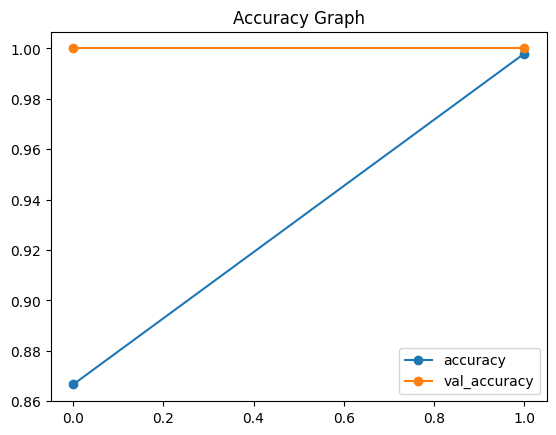

Saving pexels-pixabay-45201.jpg to pexels-pixabay-45201.jpg
Predicting: pexels-pixabay-45201.jpg


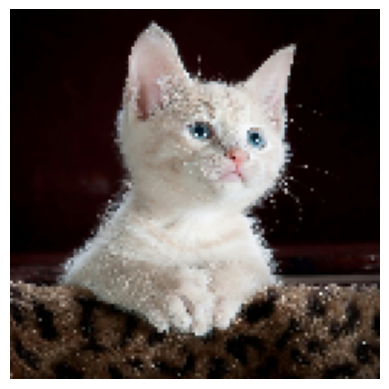

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Raw prediction value: 0.0033913914
Prediction: CAT 🐱


In [ ]:
# ===================== IMPORTS =====================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import kagglehub
import os
from google.colab import files


# ===================== DOWNLOAD DATASET =====================
path = kagglehub.dataset_download("tongpython/cat-and-dog")
print("Path to dataset files:", path)
print("Root contents:", os.listdir(path))

# Auto-detect training_set safely
if "training_set" in os.listdir(path):
    base_dir = os.path.join(path, "training_set")
else:
    subfolder = os.listdir(path)[0]
    base_dir = os.path.join(path, subfolder, "training_set")

print("Final training directory:", base_dir)
print("Classes:", os.listdir(base_dir))


# ===================== PARAMETERS =====================
height = 128
width = 128
batch = 64
epochs = 2


# ===================== DATA GENERATOR =====================
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

trainingdata = datagen.flow_from_directory(
    base_dir,
    target_size=(height, width),
    batch_size=batch,
    class_mode='binary',
    subset='training',
    seed=1
)

validationdata = datagen.flow_from_directory(
    base_dir,
    target_size=(height, width),
    batch_size=batch,
    class_mode='binary',
    subset='validation',
    seed=1
)


# ===================== CNN MODEL =====================
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(height, width, 3)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.3))
cnn.add(Dense(1, activation='sigmoid'))

cnn.summary()


# ===================== TRAIN =====================
cnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn.fit(
    trainingdata,
    epochs=epochs,
    validation_data=validationdata,
    callbacks=[earlystop]
)


# ===================== GRAPHS =====================
history_df = pd.DataFrame(history.history)

history_df[['loss', 'val_loss']].plot(marker='o', title="Loss Graph")
history_df[['accuracy', 'val_accuracy']].plot(marker='o', title="Accuracy Graph")
plt.show()


# ===================== SAVE MODEL =====================
cnn.save("dog_vs_cat_cnn.keras")


# ===================== USER IMAGE UPLOAD =====================
uploaded = files.upload()


# ===================== PREDICTION =====================
def predict_uploaded_image(img_path):
    img = image.load_img(img_path, target_size=(height, width))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    result = cnn.predict(img)
    print("Raw prediction value:", result[0][0])

    if result[0][0] >= 0.5:
        print("Prediction: DOG 🐶")
    else:
        print("Prediction: CAT 🐱")


for filename in uploaded.keys():
    print("Predicting:", filename)
    predict_uploaded_image(filename)
